In [1]:
import numpy as np
import pandas as pd

from Environment import *
from Agents import Agent
from Simulate import *
import utils

In [2]:
cg = np.array([1.0, 0.5, 0.25])
n_actions = 4
include_null = True
dt = 1.0
productivity= 10


n_products = cg.shape[0]
state_dims = 2*n_products

Ntimes = 10_000

In [3]:
def init_and_run_simulation(reward_structure, include_null):

    # Initialize
    agent = Agent(gamma=0.9, 
                      epsilon=1.0, 
                      eps_end = 0.001,
                      eps_dec = 0.01,
                      batch_size=64,  
                      input_dims=[state_dims], 
                      lr=0.001, 
                      n_actions=n_actions, 
                      )

    env = Environment(cg=cg, 
                    productivity=productivity, 
                    dt=dt, 
                    n_actions=n_actions,
                    agent=agent)

    env.set_reward_function(reward_structure)
    env.set_include_null(include_null)

    sim = Simulate(agent, env)

    omega = env.omega1
    
    print(env.reward_func)
    
    # Run simulation
    trange, Aarray, qarray, Carray, Qarray, Darray, Rarray, epsilon_list, Parray =sim.run_simulation(Ntimes)
    
    # Plot
    print('States')
    utils.plot_states(trange, Aarray, qarray, Carray, Qarray, Darray)
    print('Decisions')
    utils.plot_decisions(trange, Darray, Rarray, epsilon_list, Parray, omega)

Using Consumption Error Linear Reward

error
States
Decisions


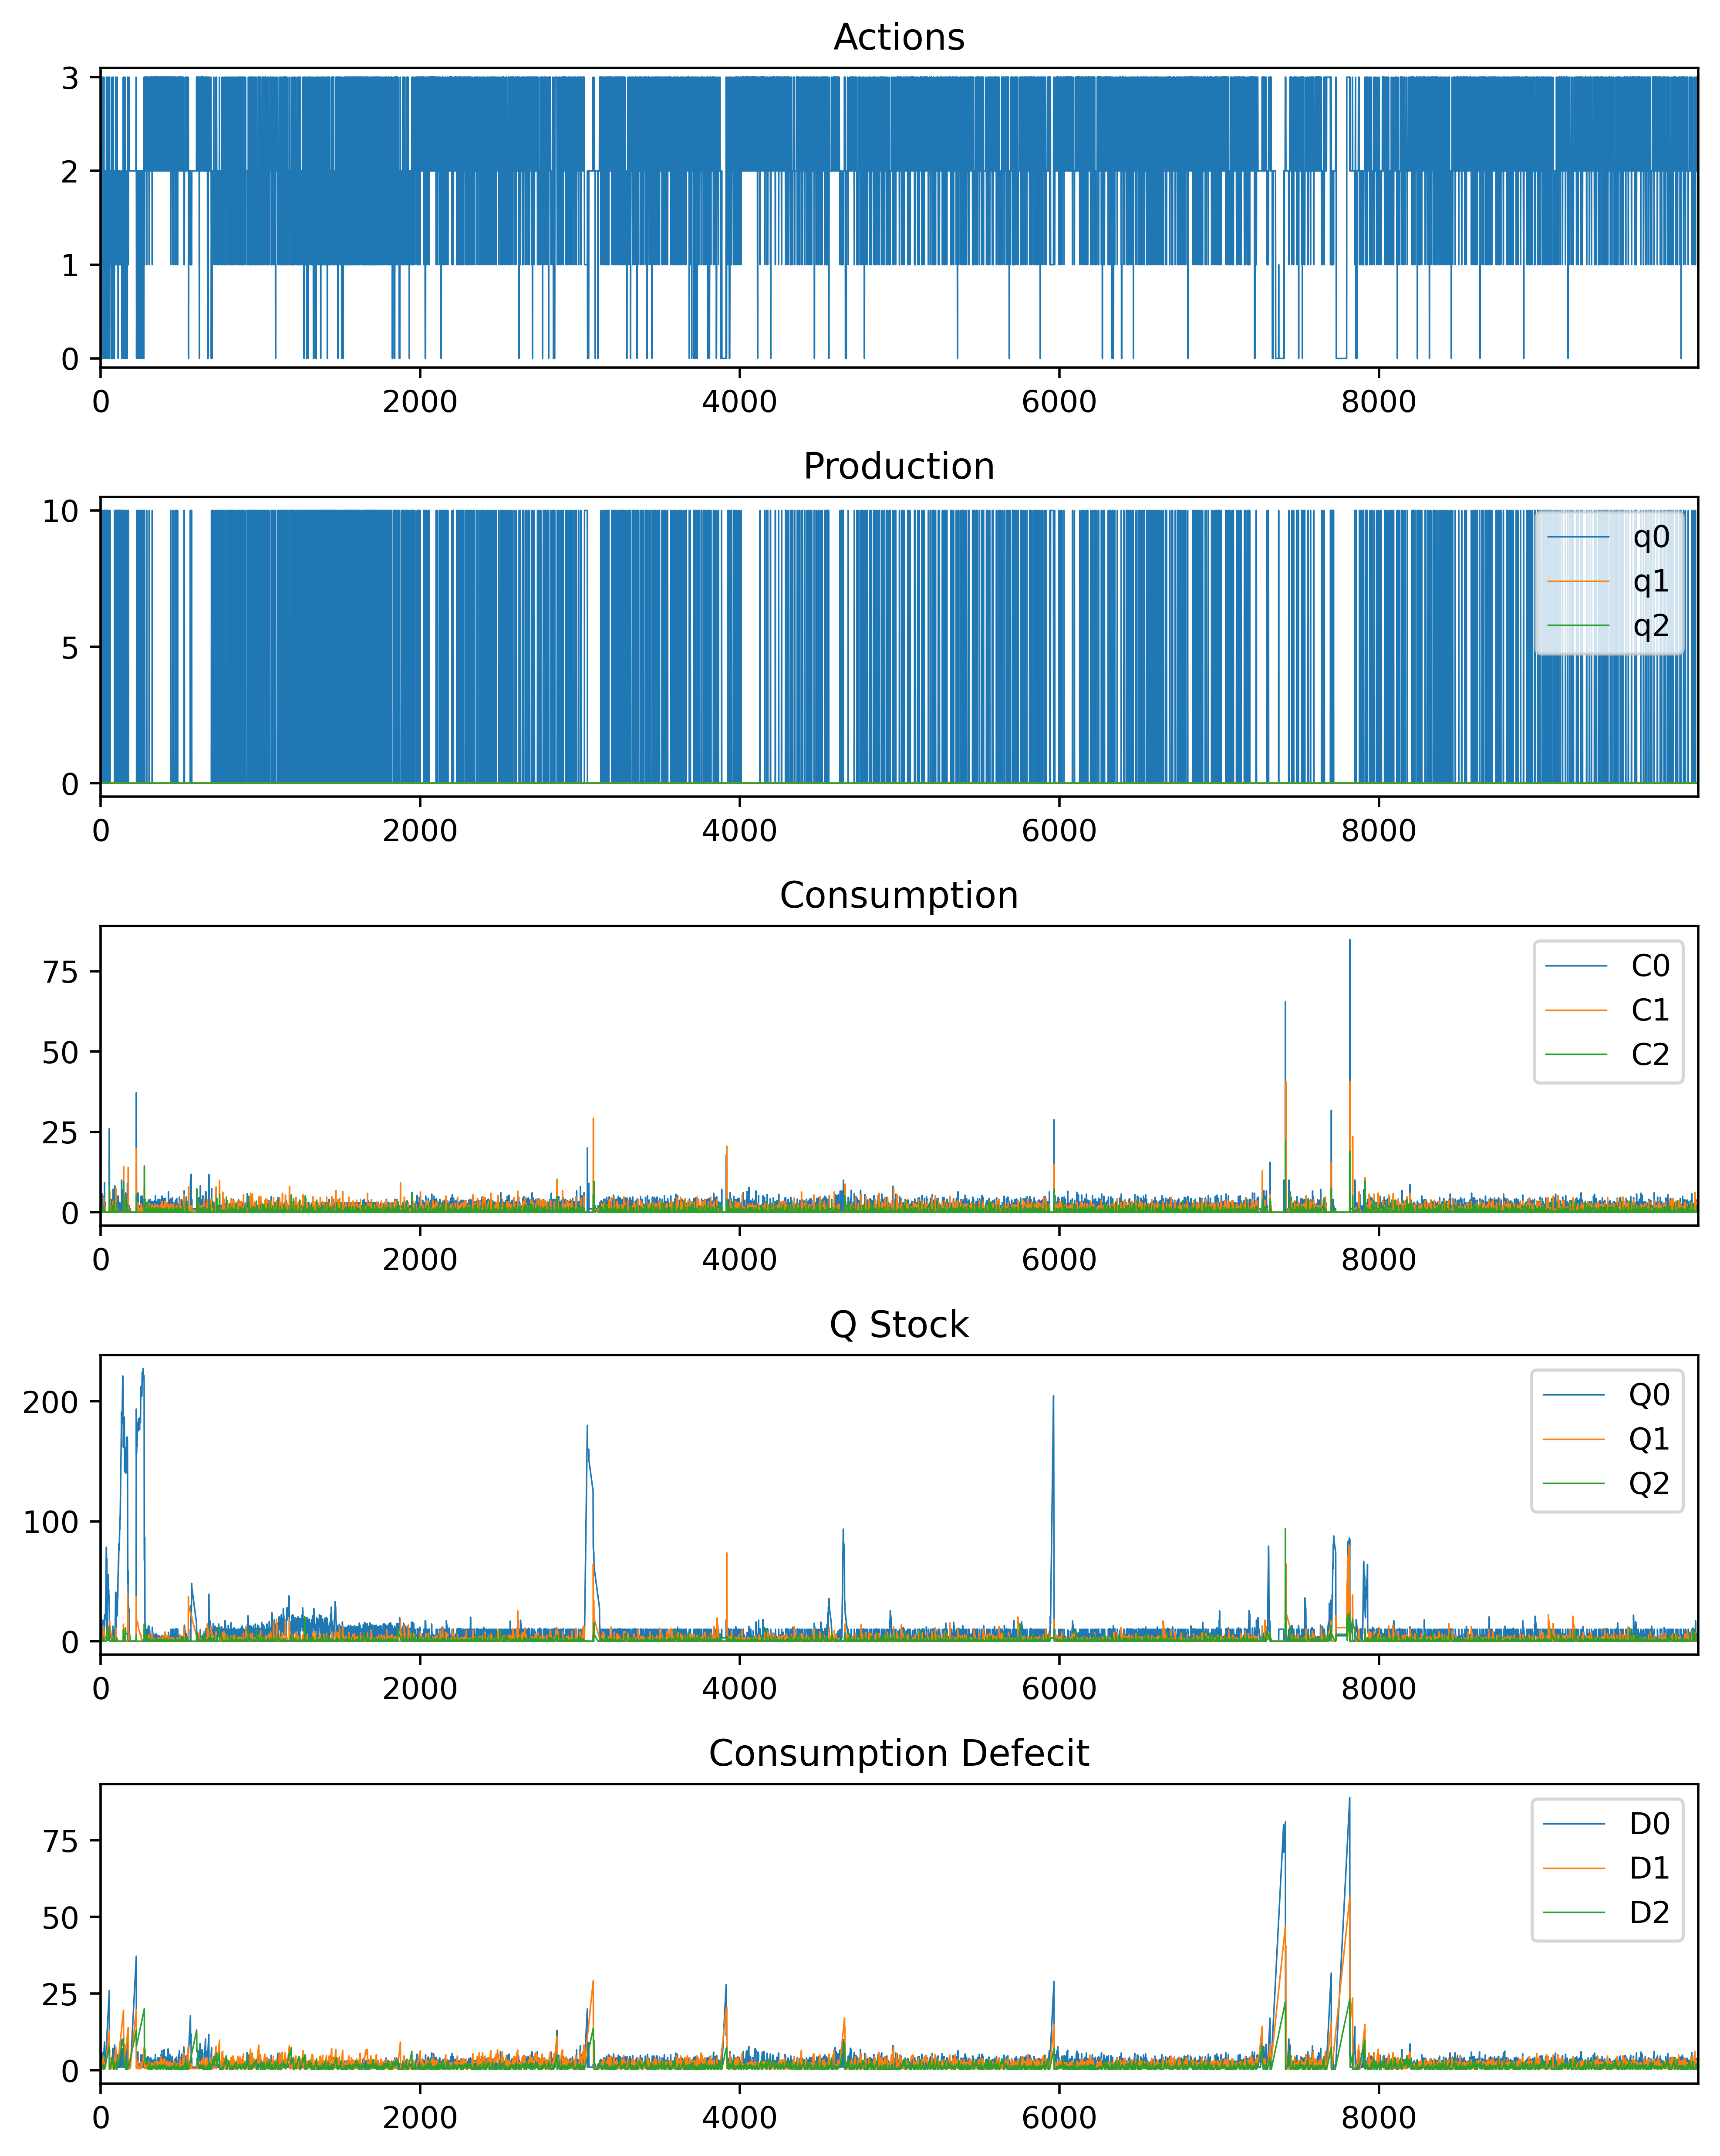

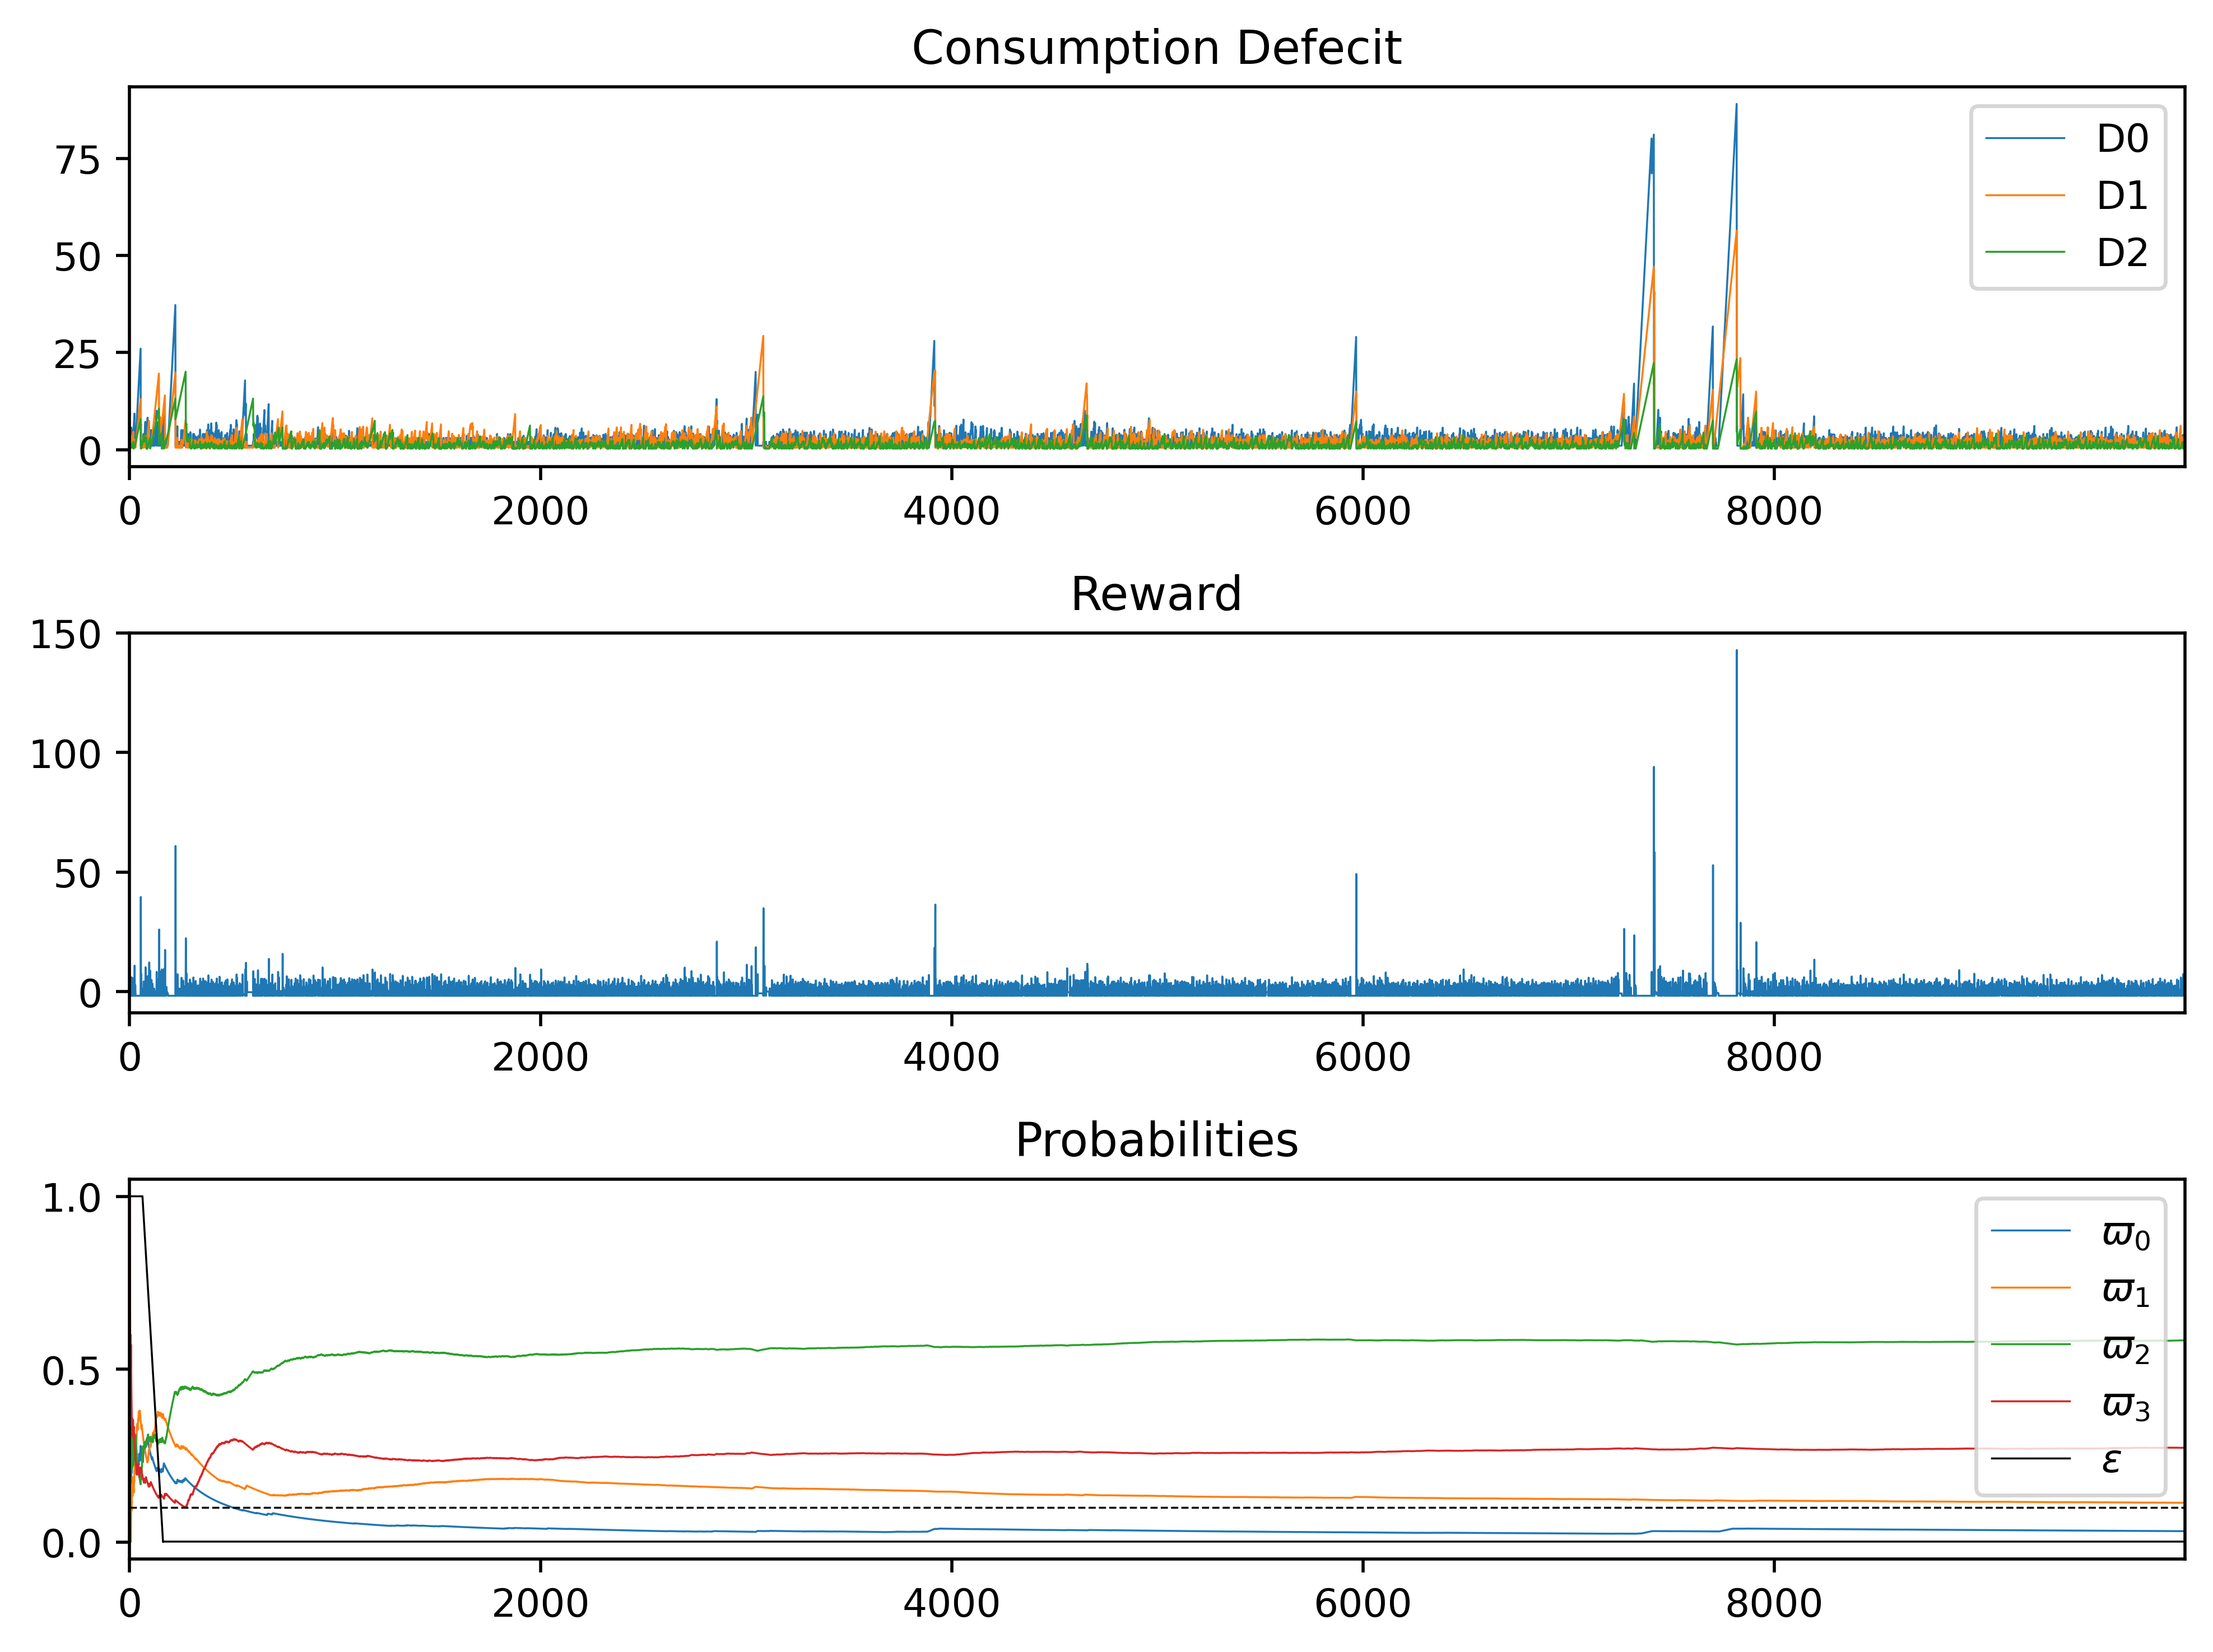

In [4]:
reward_structure = 'error'
init_and_run_simulation(reward_structure, include_null)

Using Deficit Linear Rewards

deficit
States
Decisions


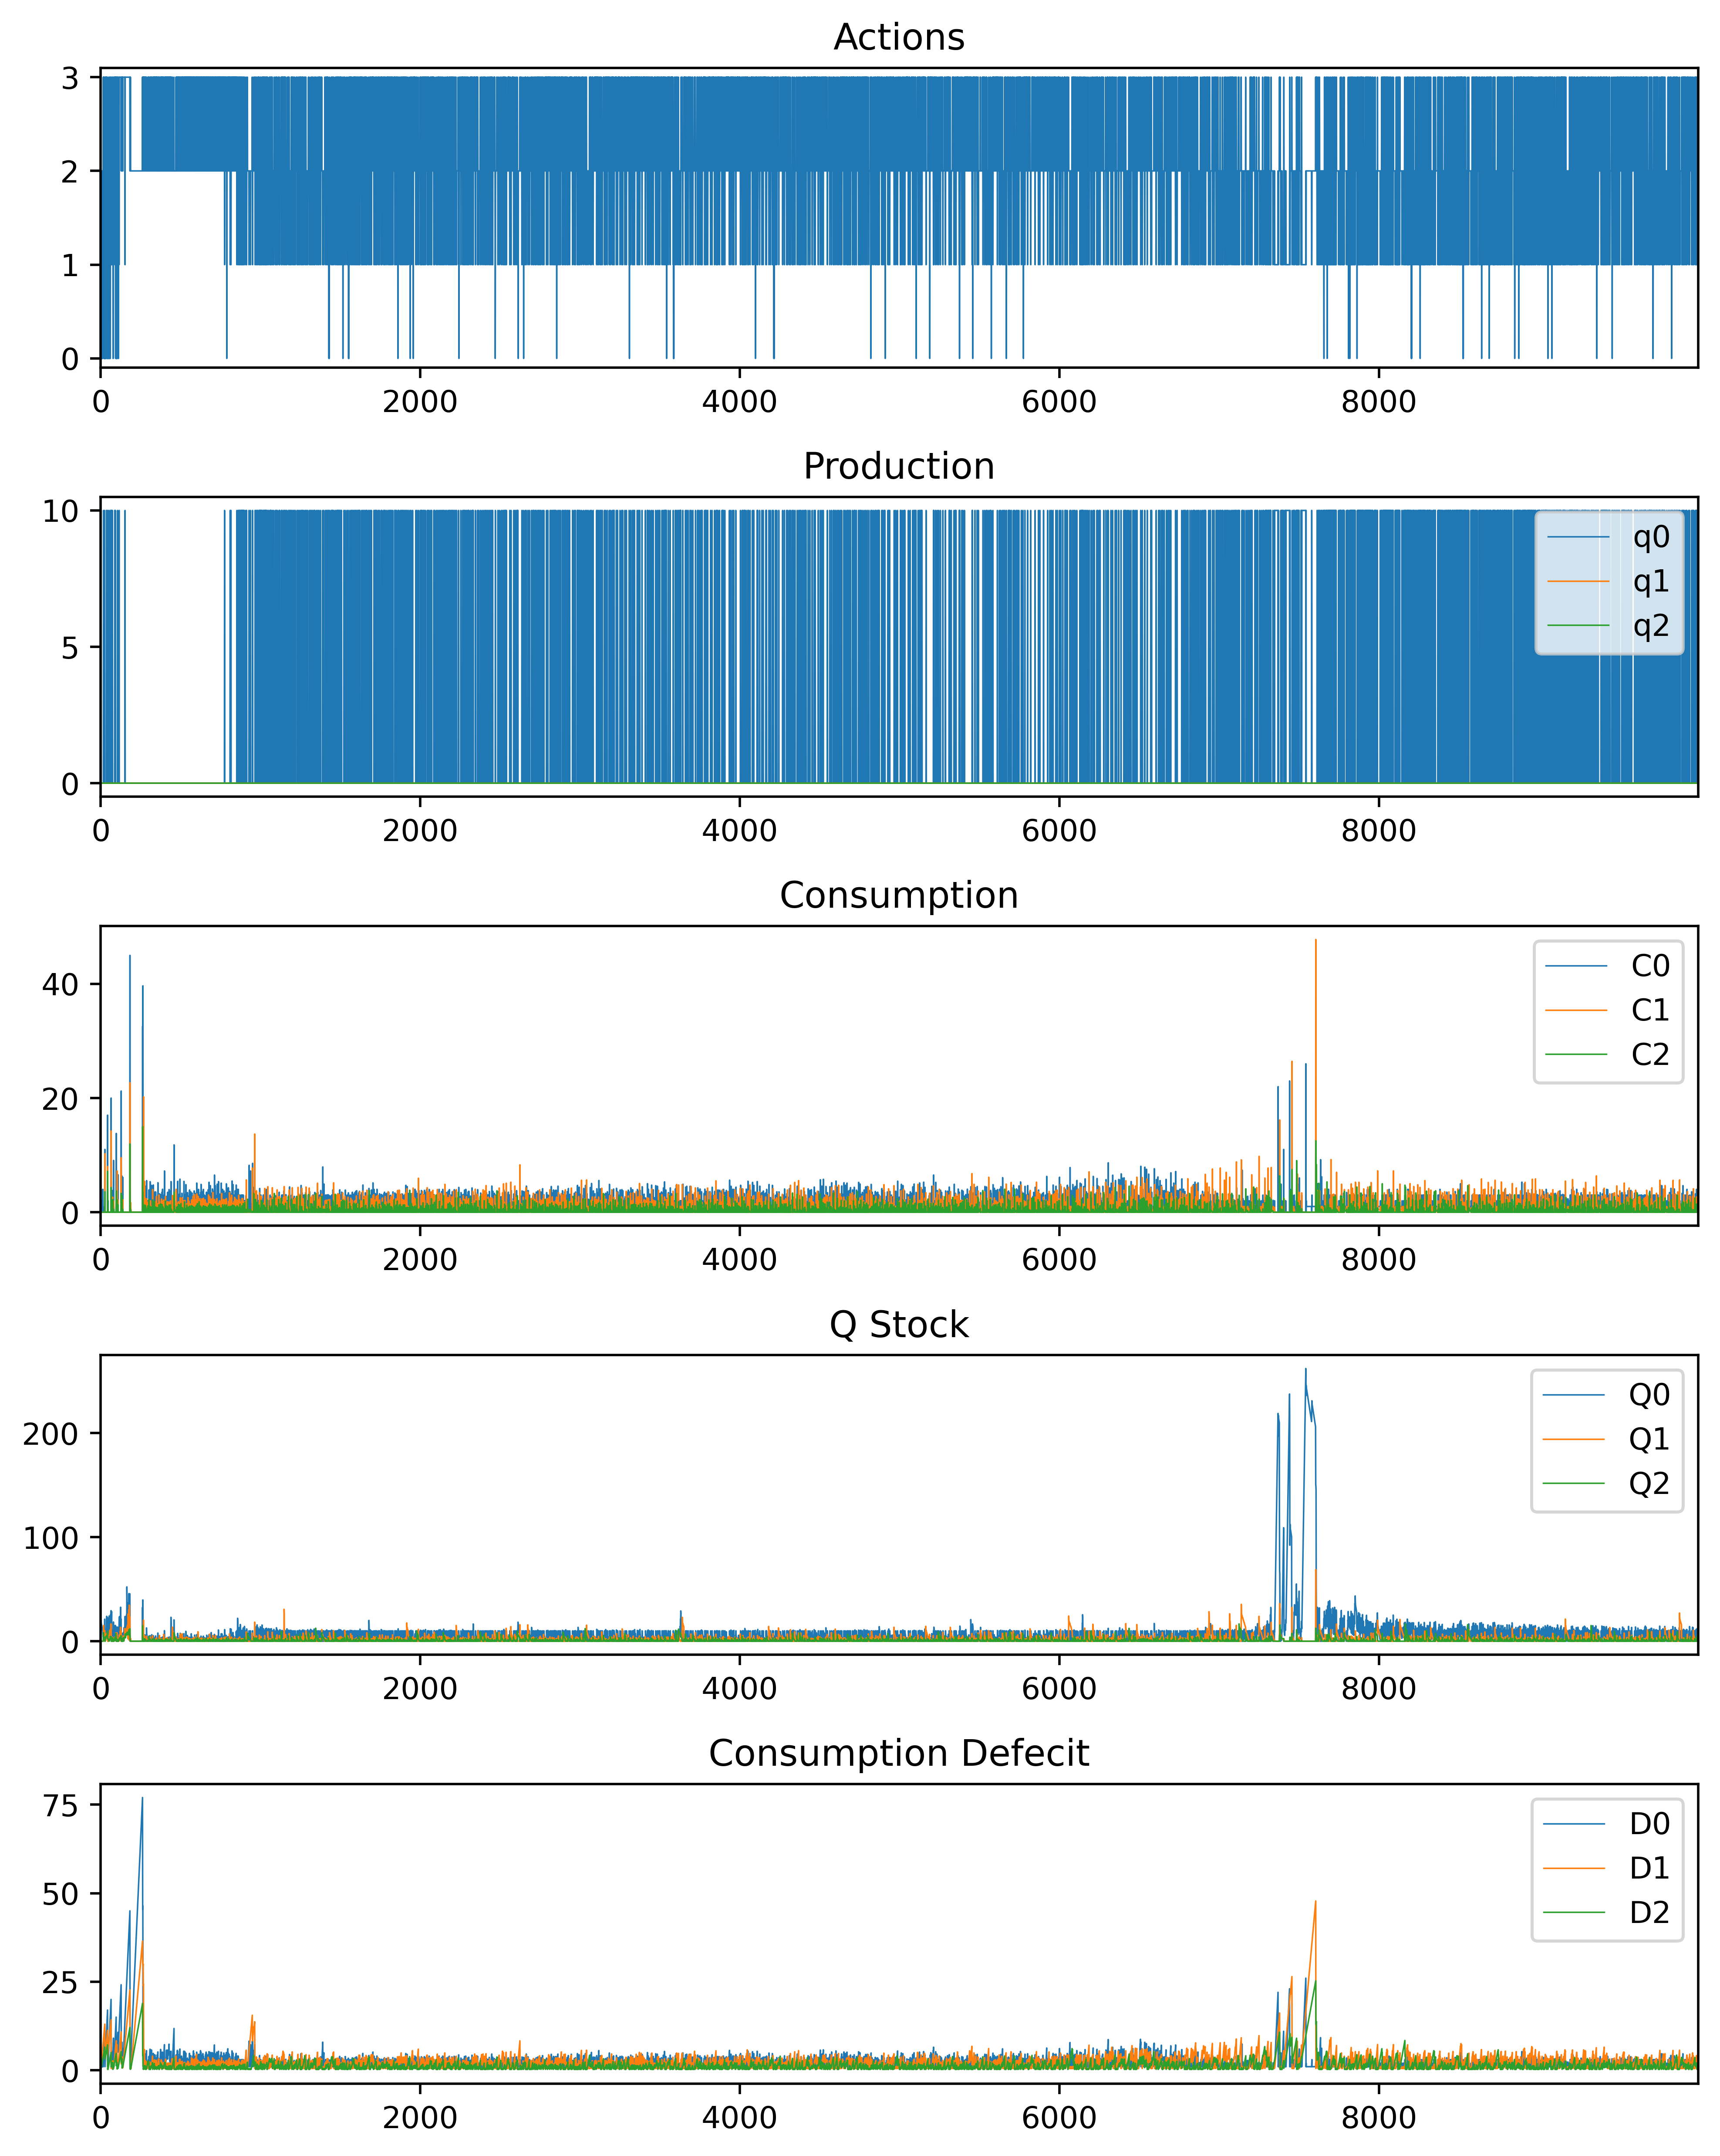

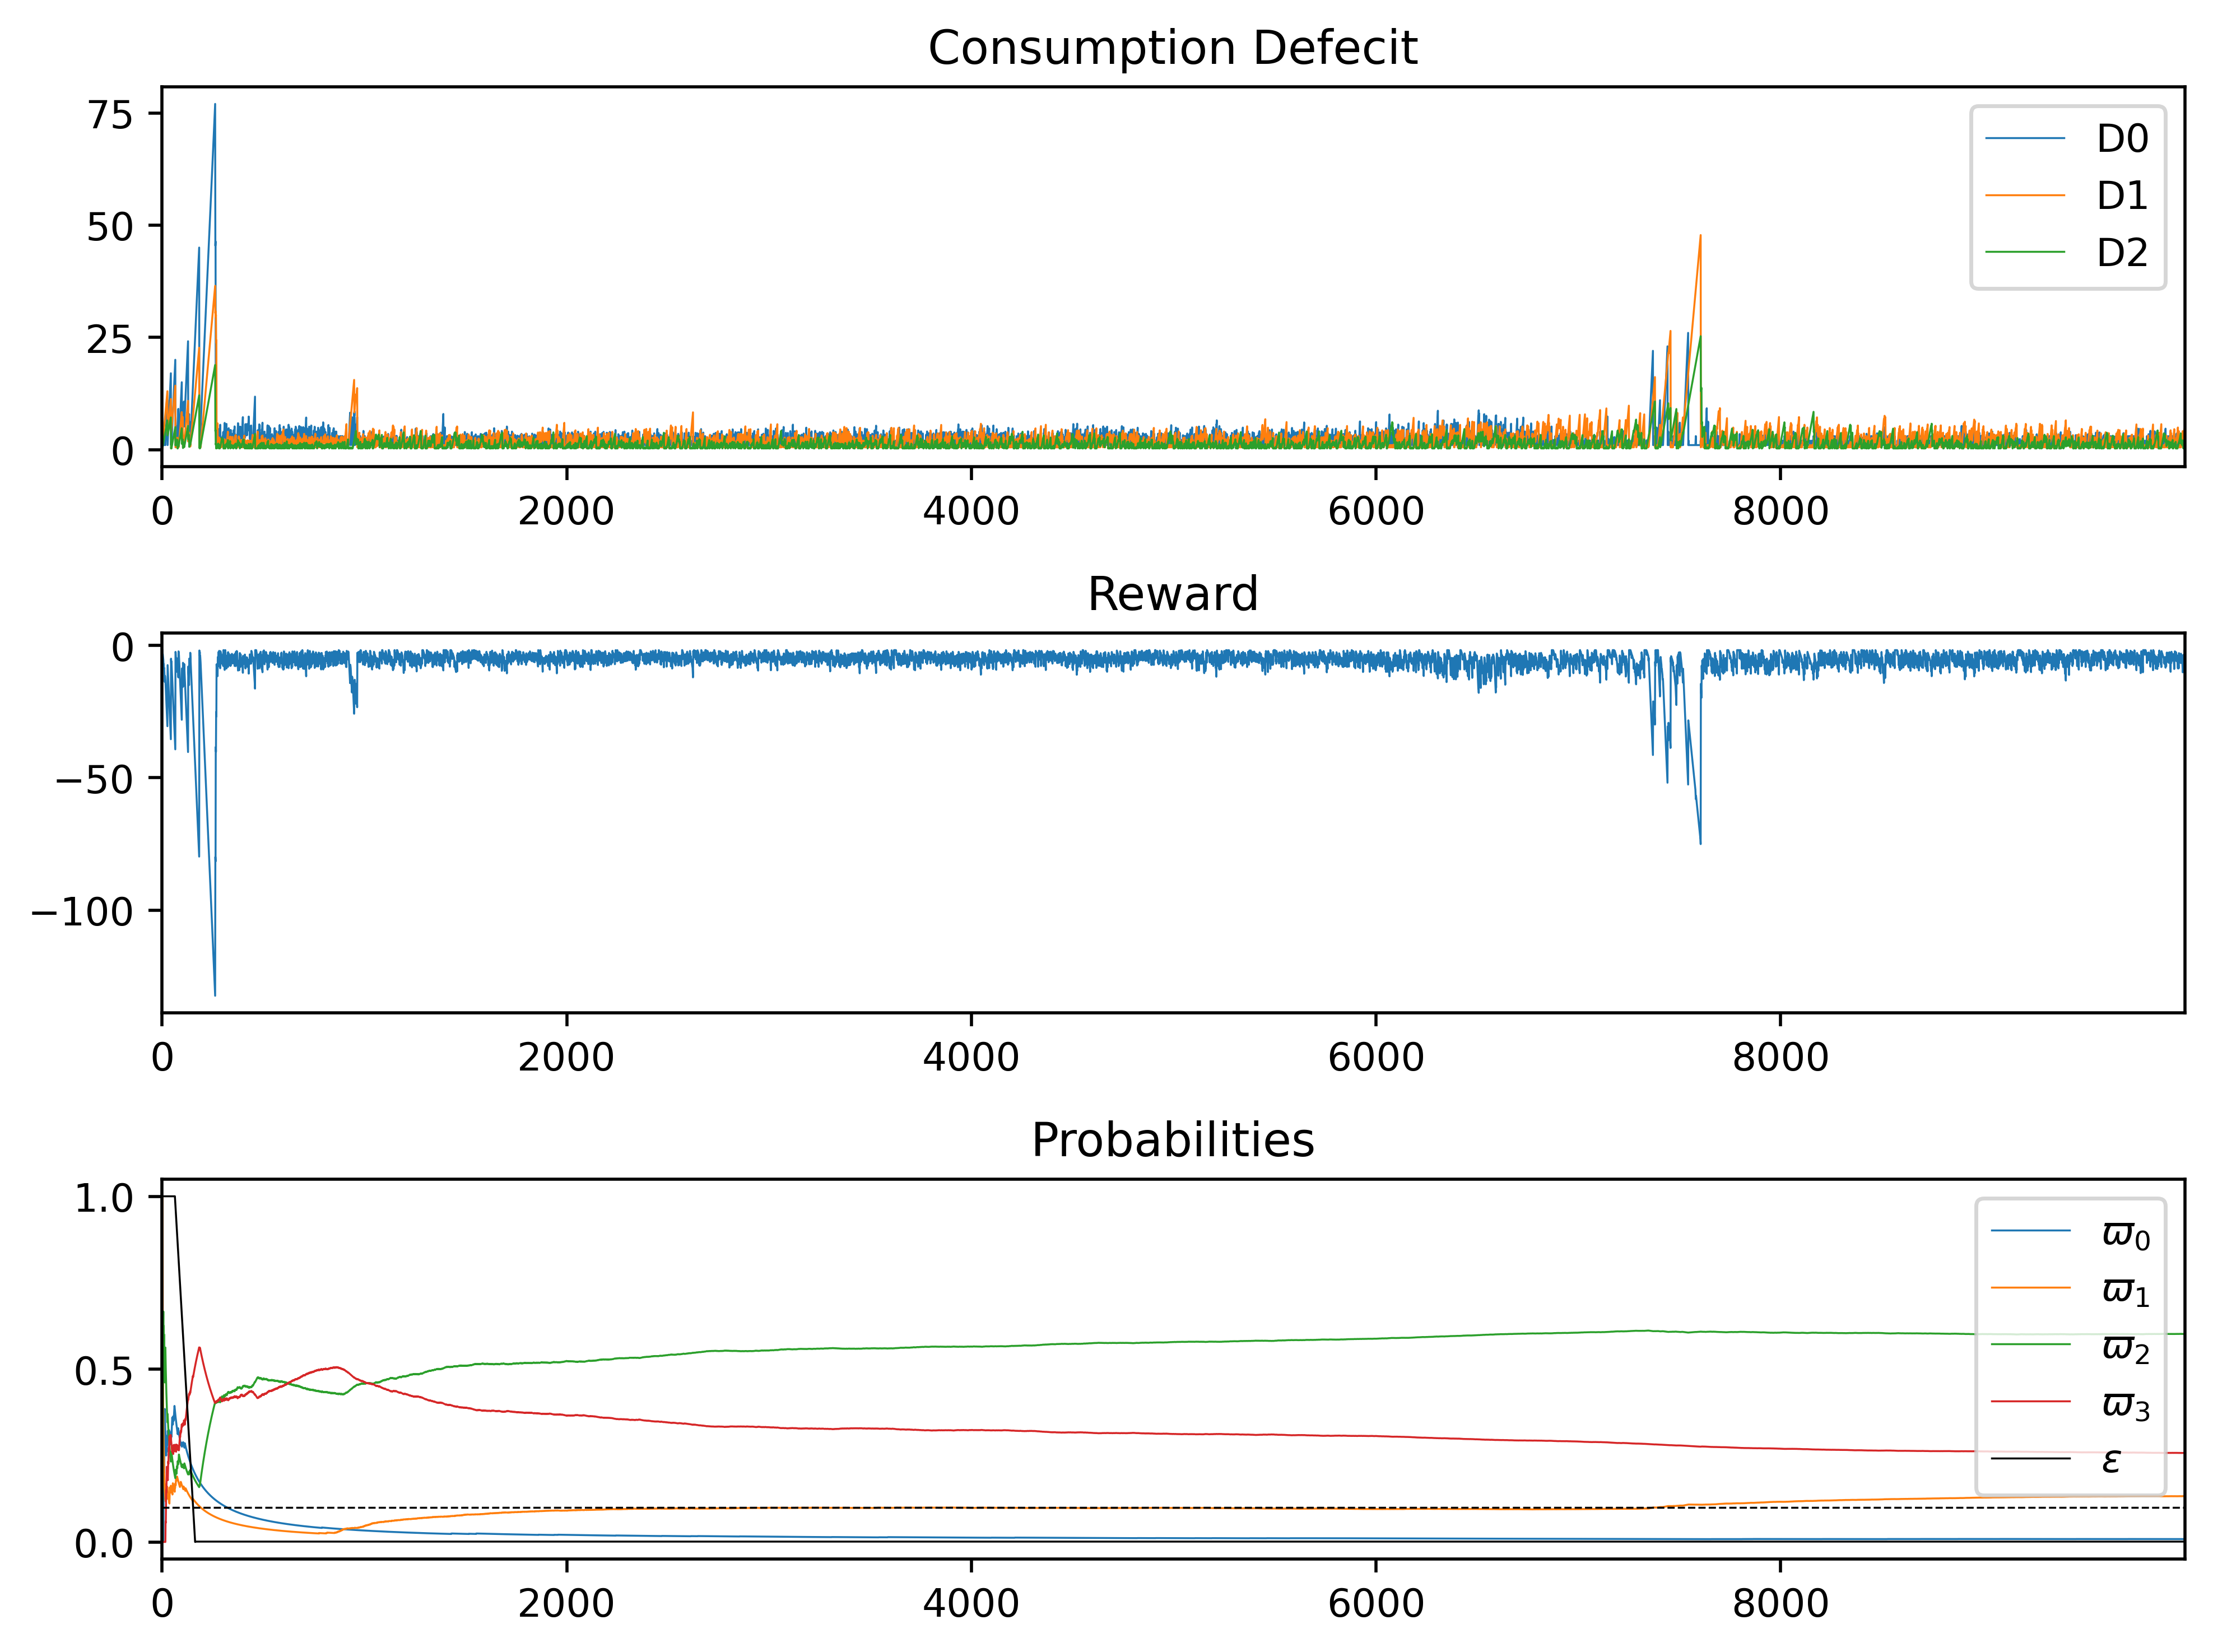

In [5]:
reward_structure = 'deficit'
init_and_run_simulation(reward_structure, include_null)

Using Consumption Error Exponential Rewards

exponential error
States
Decisions


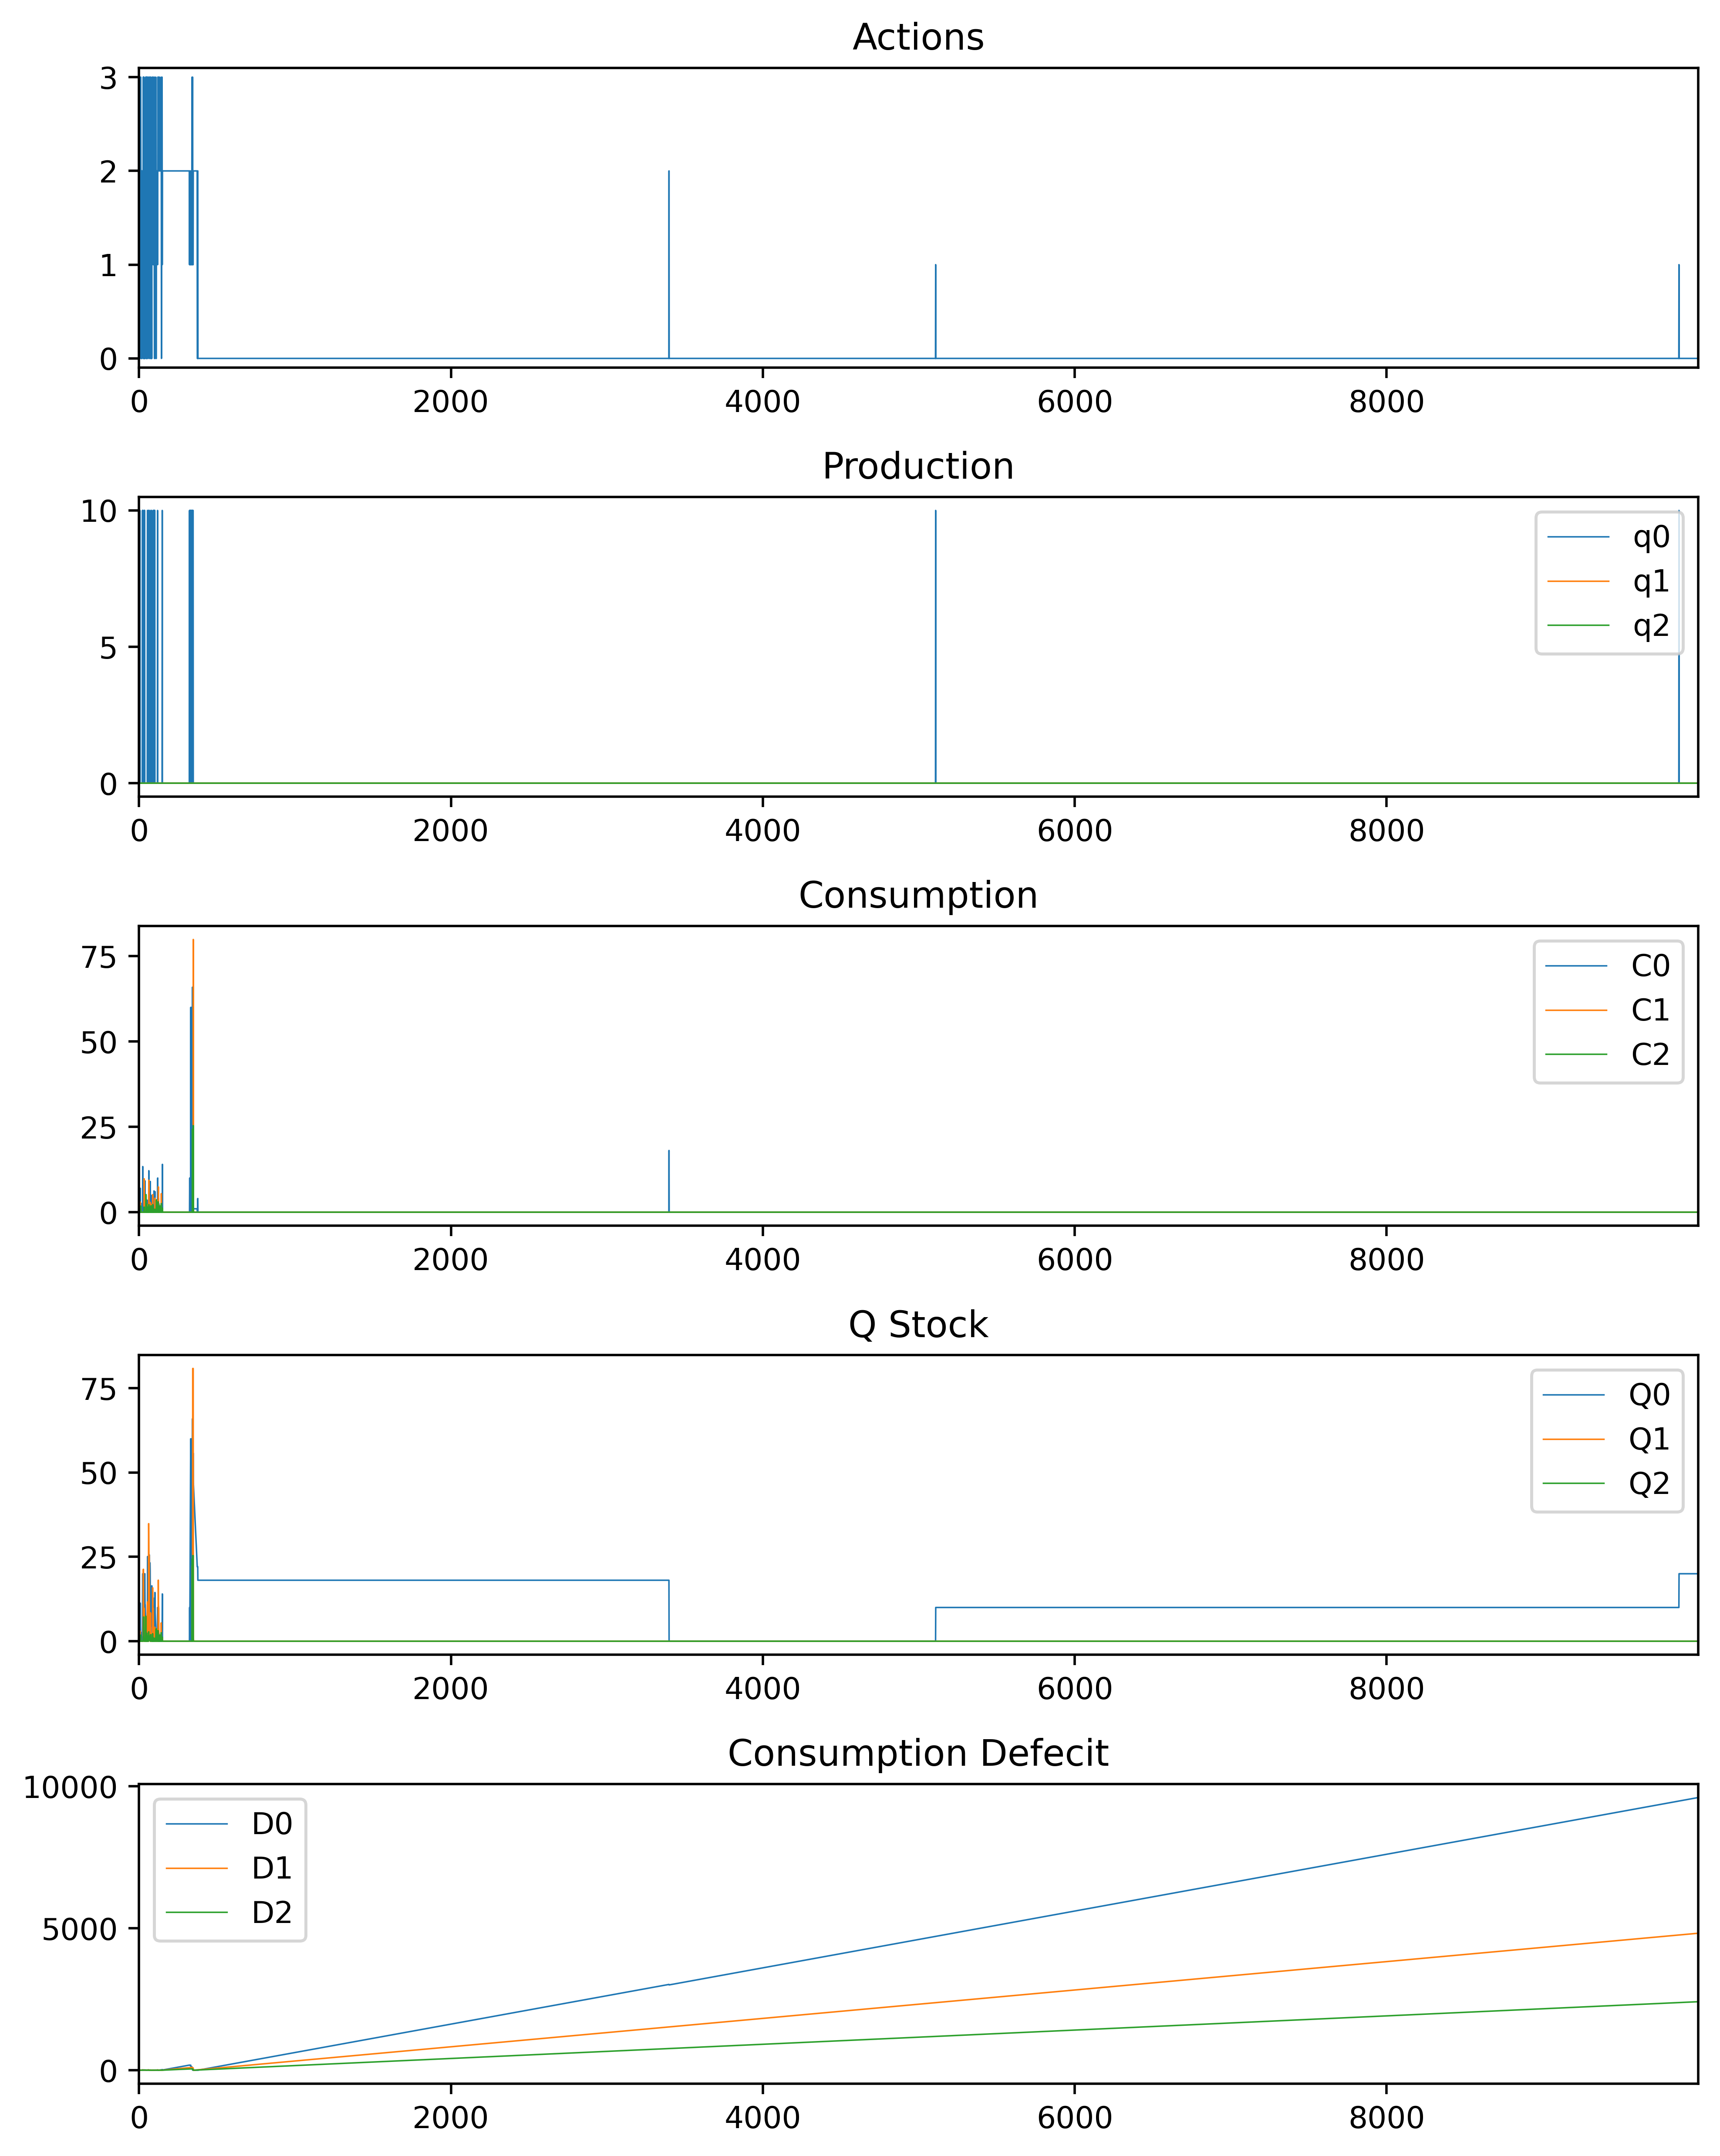

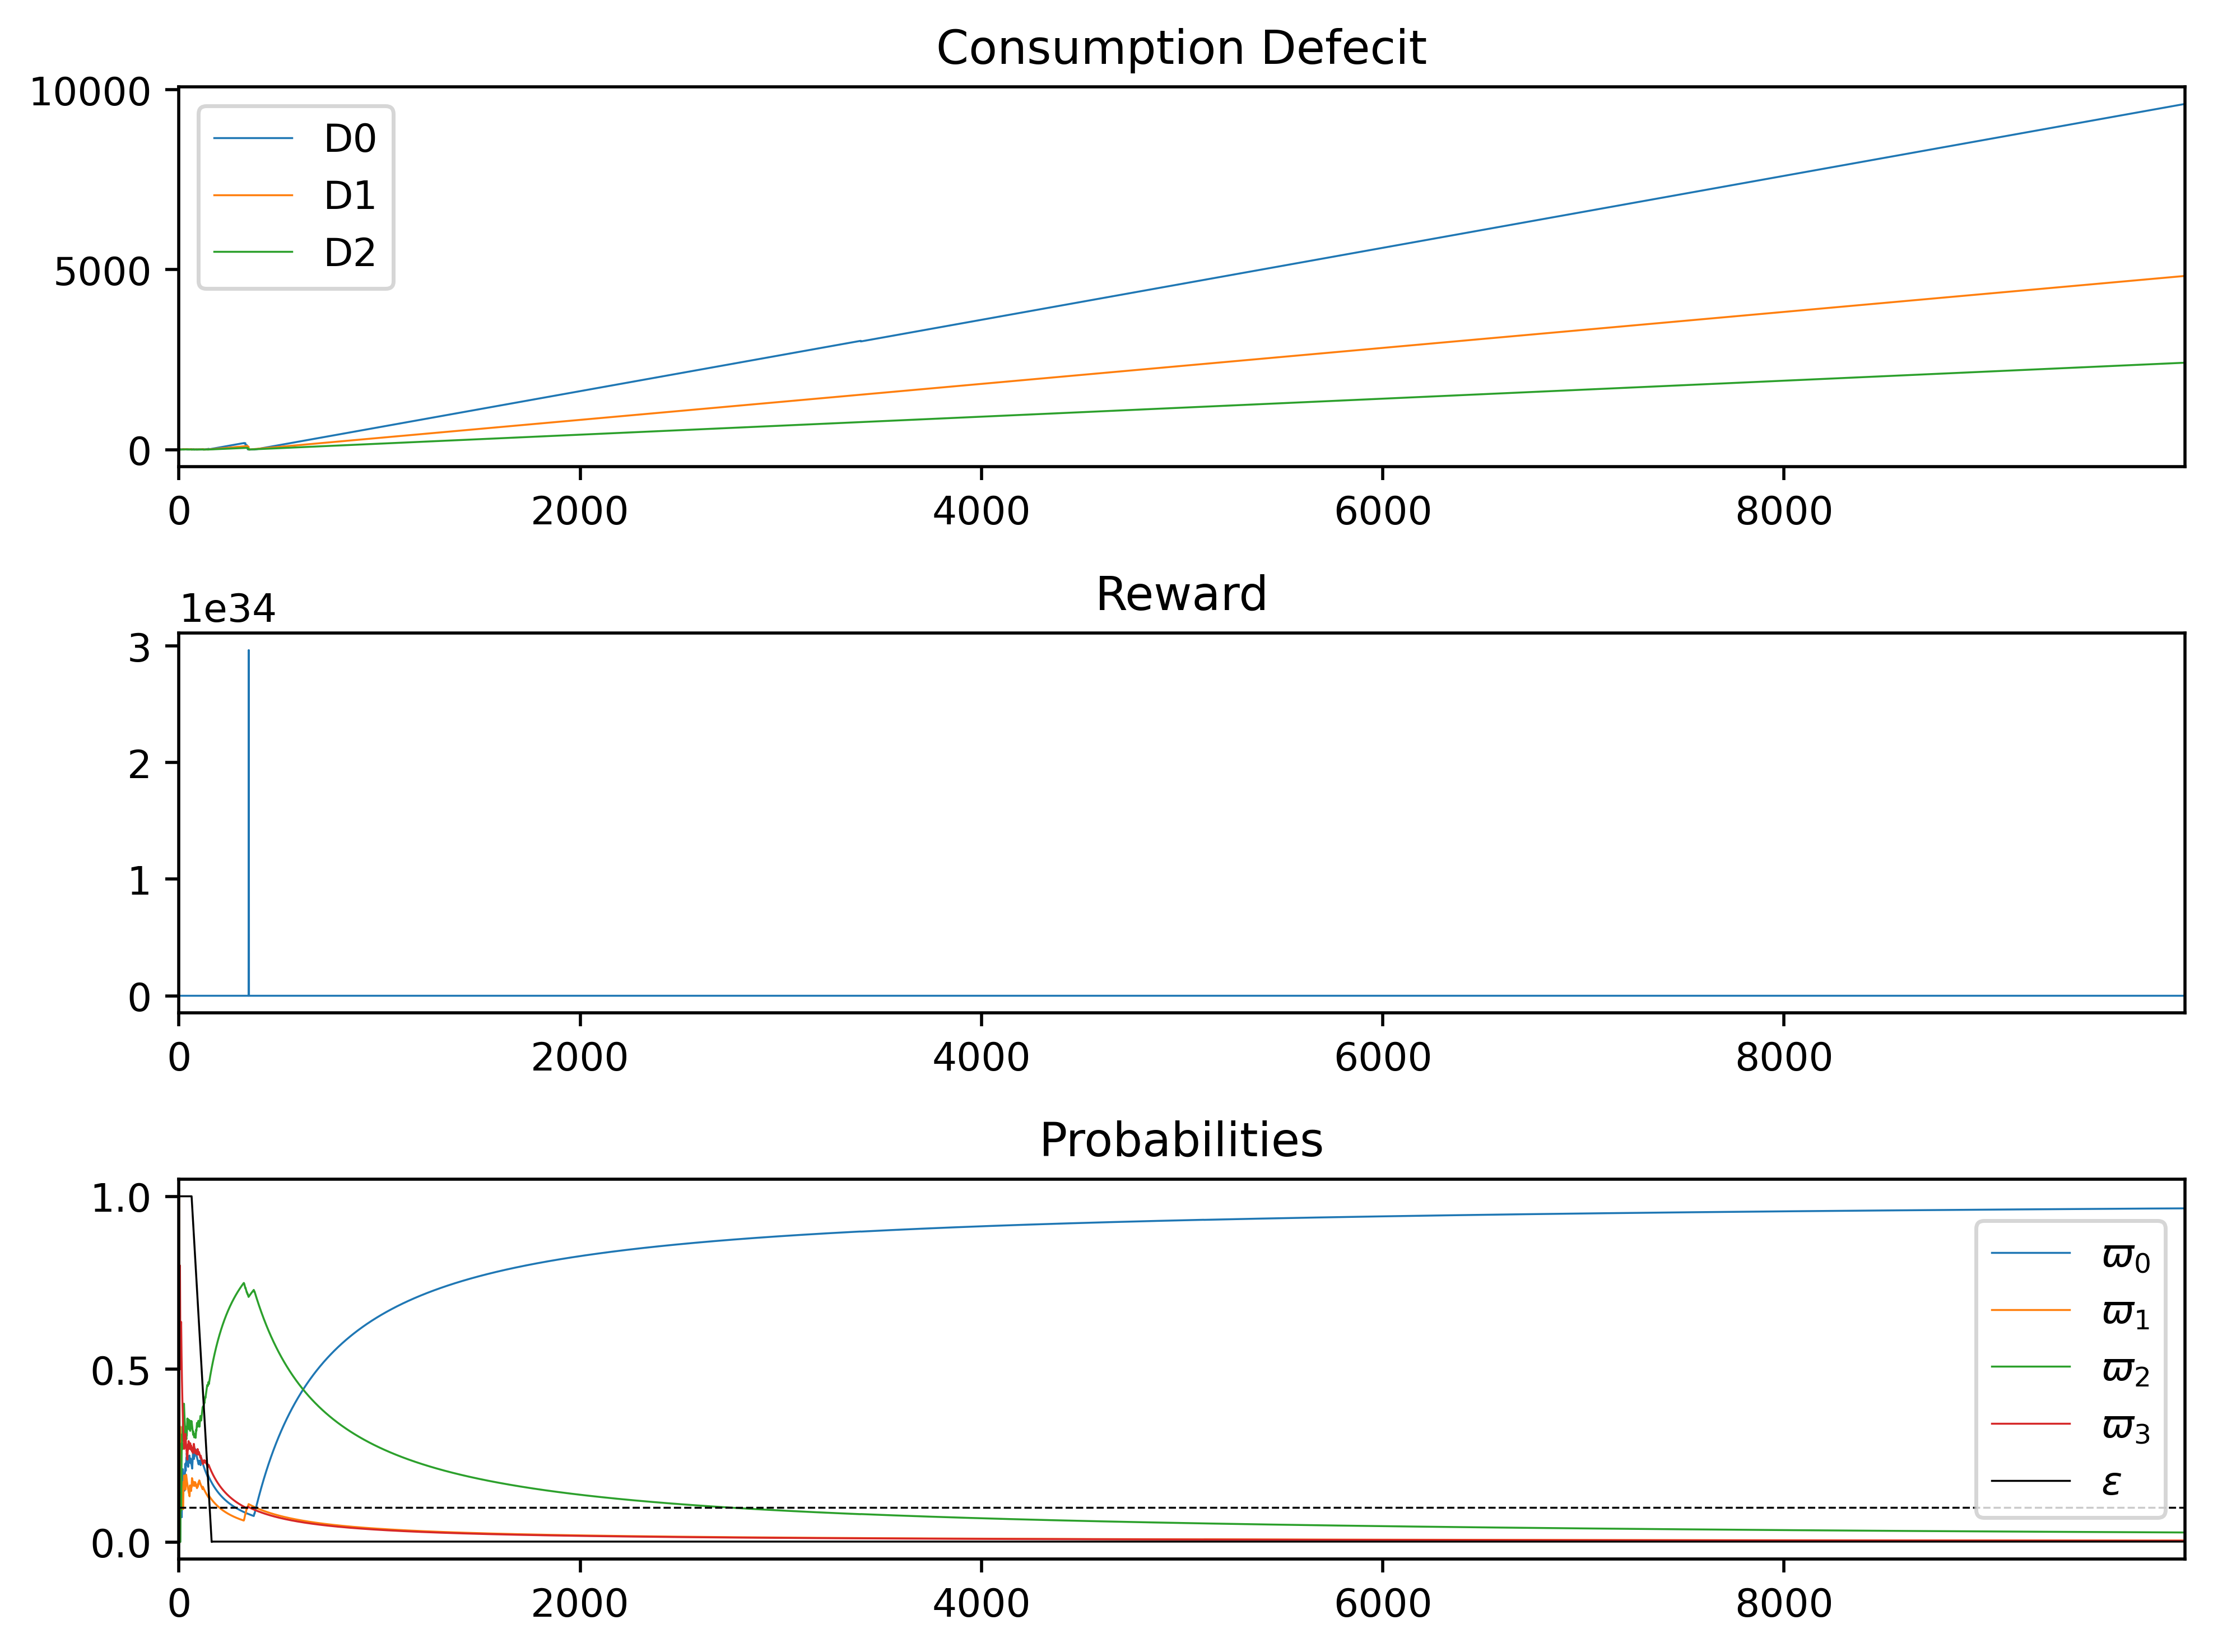

In [6]:
reward_structure = 'exponential error'
init_and_run_simulation(reward_structure, include_null)

Using Deficit Exponential Rewards

exponential deficit
States
Decisions


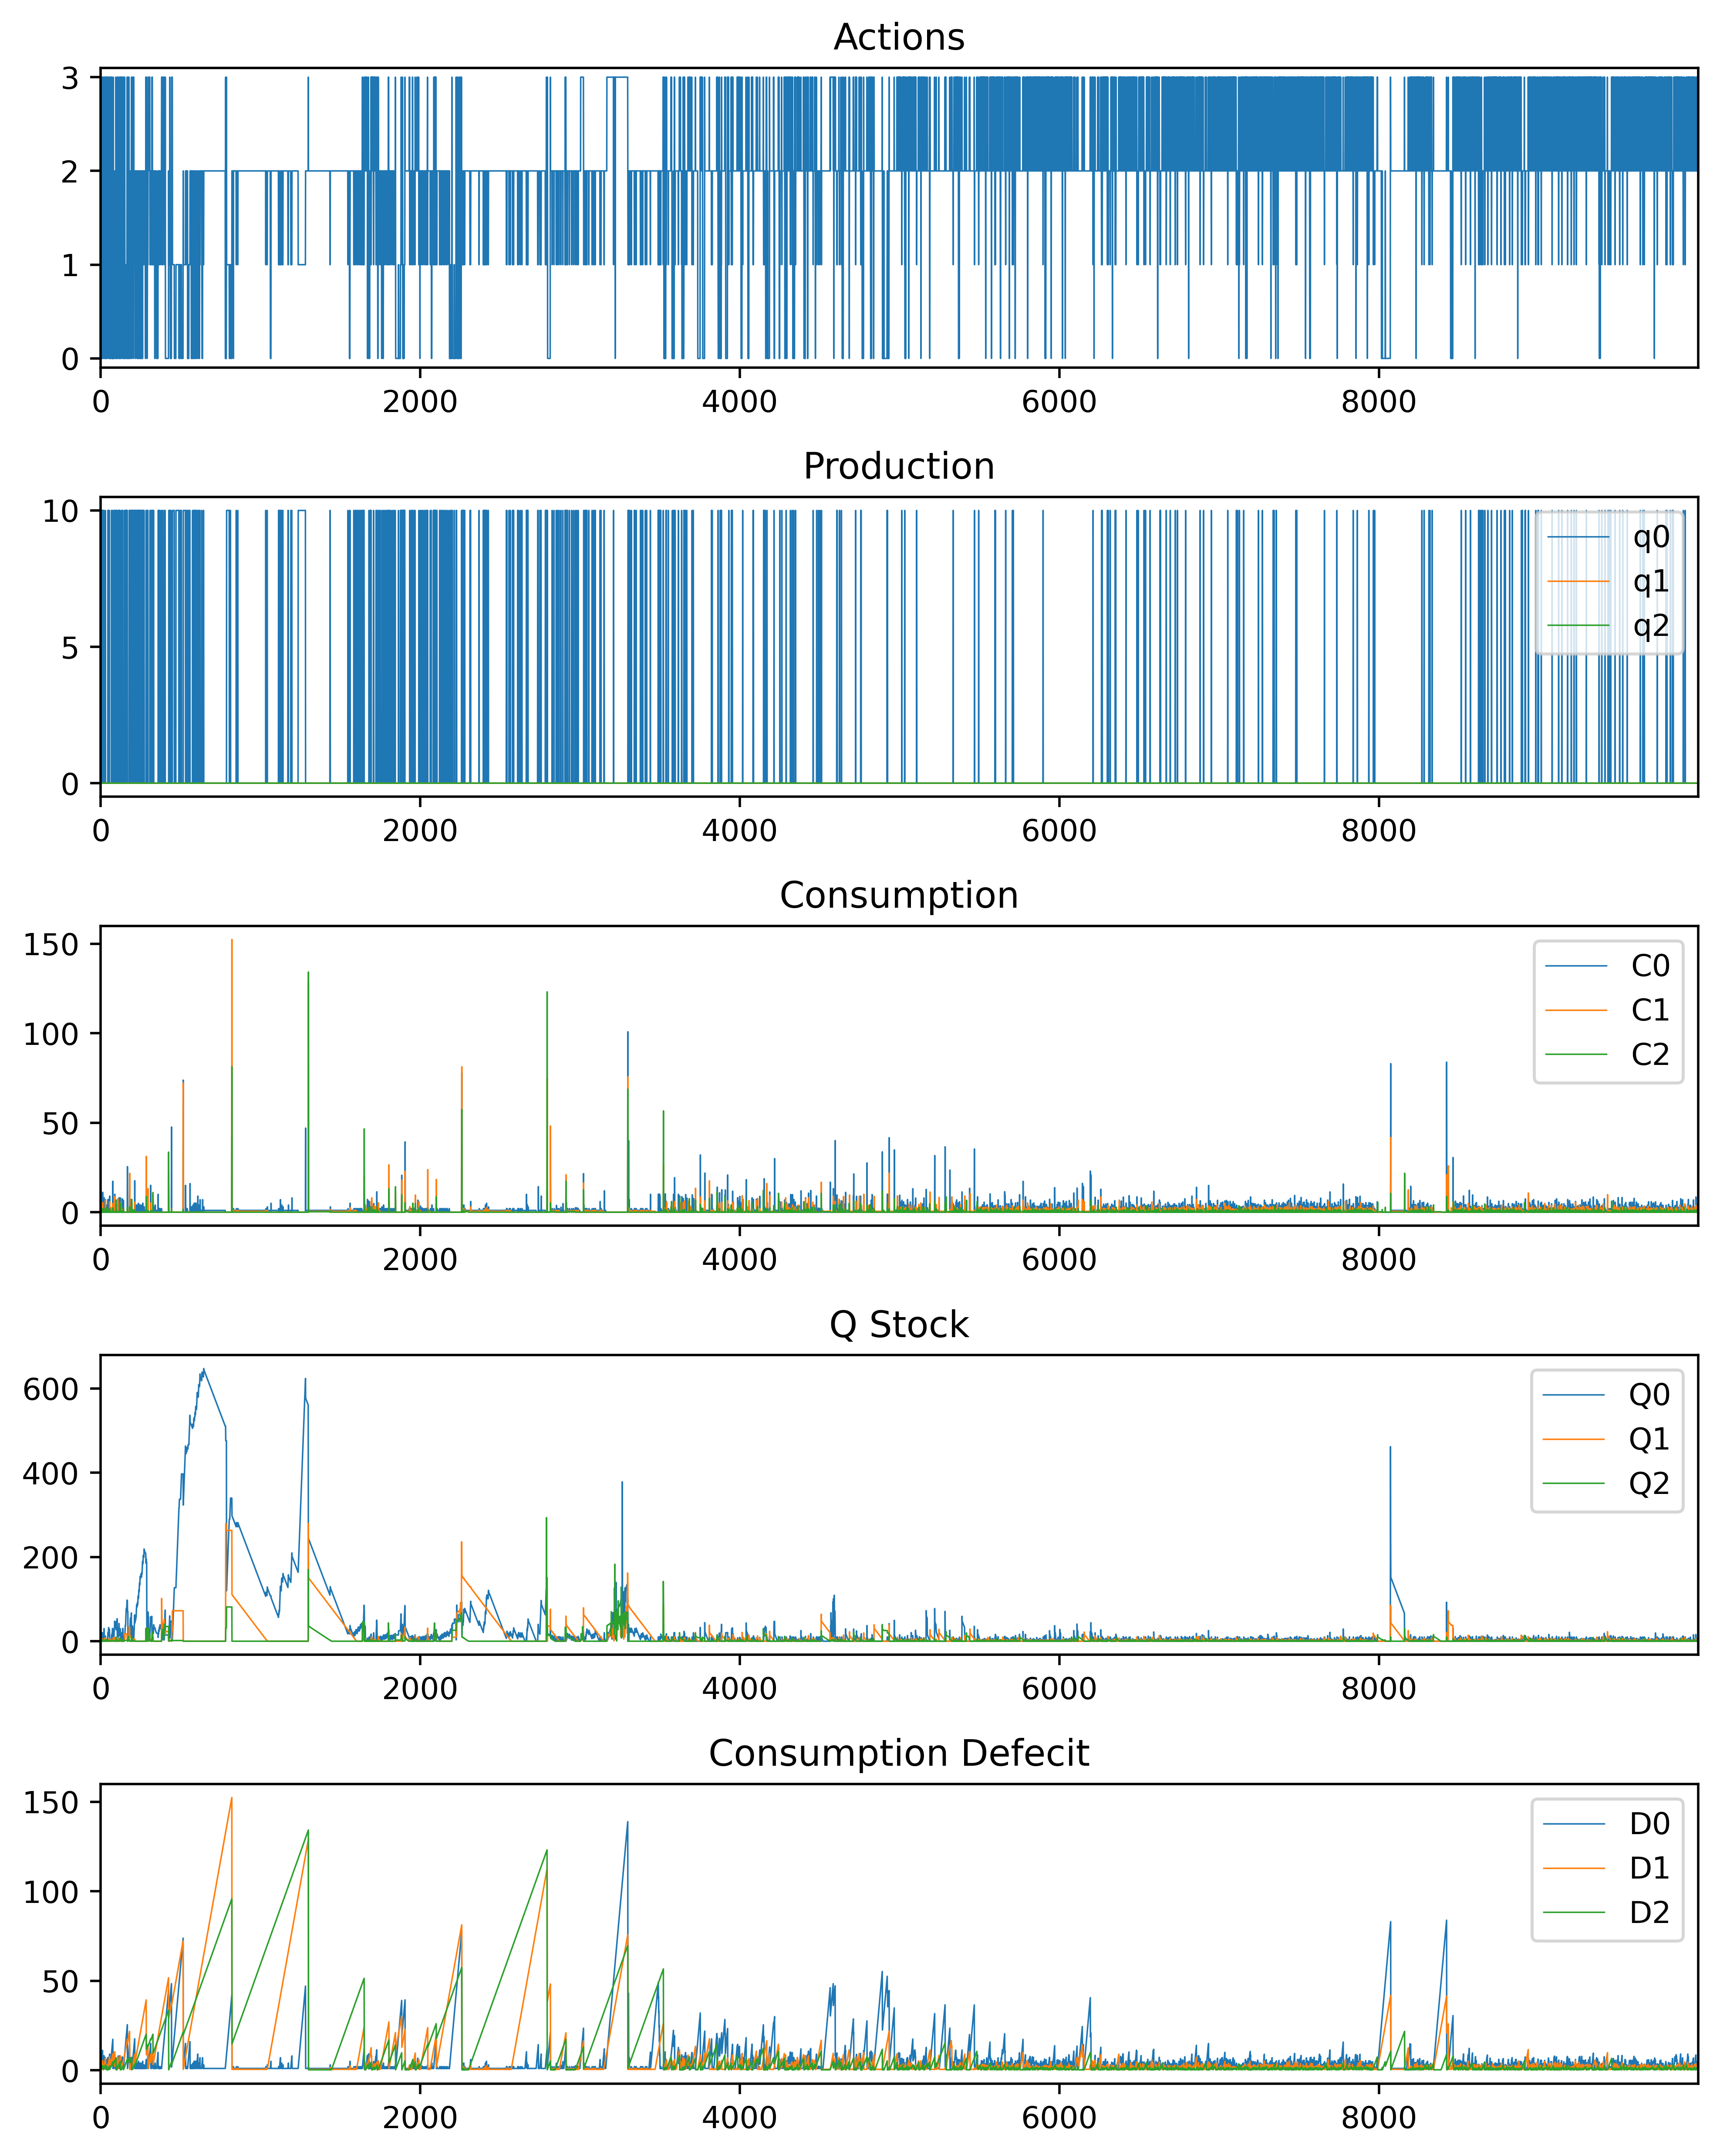

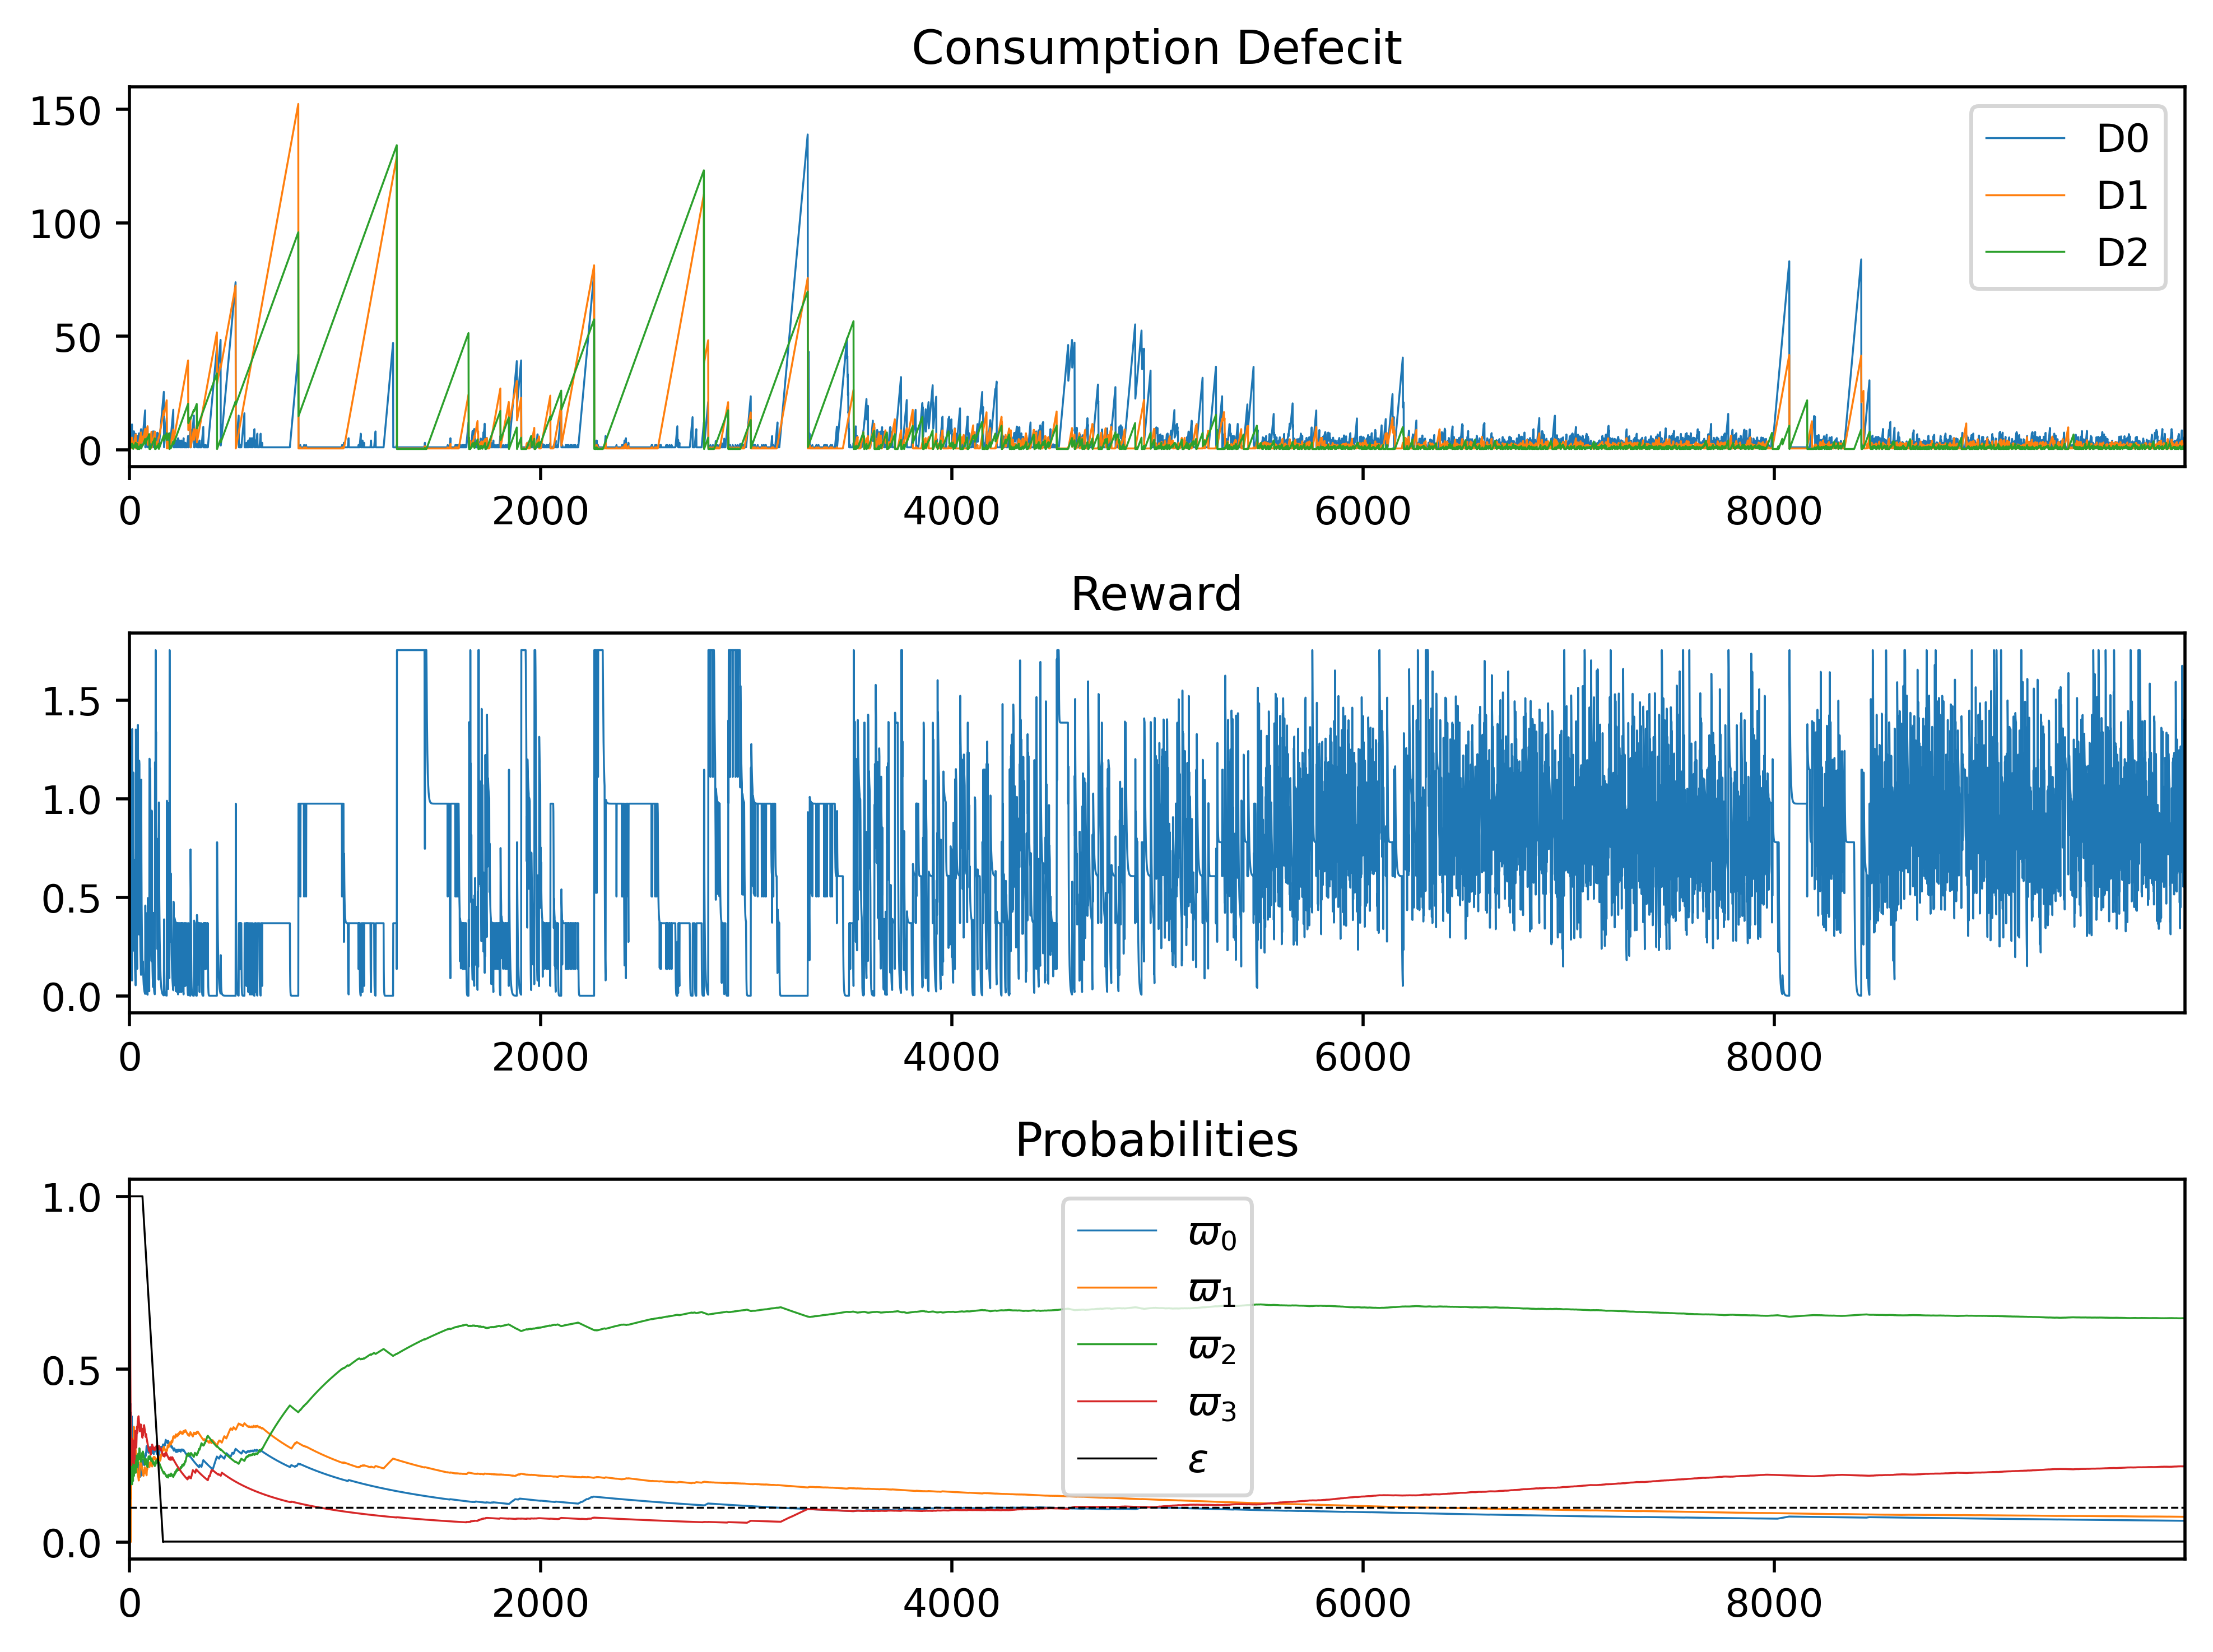

In [7]:
reward_structure = 'exponential deficit'
init_and_run_simulation(reward_structure, include_null)